## **Milestone 1: Data Exploration and Preprocessing**

In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Simple Exploration**

In [447]:
df = pd.read_csv("Data/car_prices.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [449]:
df.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.923700e+04,1.923700e+04,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN
freq,NaN,NaN,5819,3769,1083,NaN,8736,13954,10150,3916,721,NaN,13514,12874,18332,17753,5033,NaN
mean,4.557654e+07,1.855593e+04,NaN,NaN,NaN,2010.912824,NaN,NaN,NaN,NaN,NaN,4.582991,NaN,NaN,NaN,NaN,NaN,6.582627
std,9.365914e+05,1.905813e+05,NaN,NaN,NaN,5.668673,NaN,NaN,NaN,NaN,NaN,1.199933,NaN,NaN,NaN,NaN,NaN,4.320168
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4.569837e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,4.577231e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,4.580204e+07,2.207500e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


----

**Handle Types:**

In [450]:
df["Levy"].value_counts()

Levy
-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64

In [451]:
# Levy: Replace "-" with 0 and convert to int
df["Levy"].replace("-", 0, inplace=True)
df["Levy"] = df["Levy"].astype("int32")

C:\Users\eslam\AppData\Local\Temp\ipykernel_14436\1523896074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Levy"].replace("-", 0, inplace=True)


In [452]:
df["Category"].value_counts()

Category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: count, dtype: int64

In [453]:
# Category: Convert to category
df["Category"] = df["Category"].astype("category")

In [454]:
# Leather interior: Convert to bool
df["Leather interior"] = df["Leather interior"].replace("Yes", True).replace("No", False)
df["Leather interior"] = df["Leather interior"].astype(bool)

C:\Users\eslam\AppData\Local\Temp\ipykernel_14436\3472912381.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Leather interior"] = df["Leather interior"].replace("Yes", True).replace("No", False)


In [455]:
# Fuel type: Convert to category
df["Fuel type"] = df["Fuel type"].astype("category")

In [456]:
df["Engine volume"].value_counts()

Engine volume
2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

In [457]:
# create a new column "has_Turbo"
df["has_Turbo"] = df["Engine volume"].str.contains("Turbo")
df["has_Turbo"] = df["has_Turbo"].astype(bool)

In [458]:
# Engine volume: Replace " Turbo" with "" and convert to float
df["Engine volume"] = df["Engine volume"].str.replace(" Turbo", "")
df["Engine volume"] = df["Engine volume"].astype(float)

In [459]:
# Mileage: Replace " km" with "" and convert to int
df["Mileage"] = df["Mileage"].str.replace(" km", "")
df["Mileage"] = df["Mileage"].astype("int32")

In [460]:
df["Cylinders"].value_counts()

Cylinders
4.0     14367
6.0      3462
8.0       991
5.0       169
3.0       107
2.0        42
1.0        38
12.0       38
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: count, dtype: int64

In [461]:
# Cylinders: convert to int
df["Cylinders"] = df["Cylinders"].astype("int32")

In [462]:
df["Gear box type"].value_counts()

Gear box type
Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: count, dtype: int64

In [463]:
# Gear box type: Convert to category
df["Gear box type"] = df["Gear box type"].astype("category")

In [464]:
df["Drive wheels"].value_counts()

Drive wheels
Front    12874
4x4       4058
Rear      2305
Name: count, dtype: int64

In [465]:
# Drive wheels: Convert to category
df["Drive wheels"] = df["Drive wheels"].astype("category")

In [466]:
df["Doors"].value_counts()

Doors
04-May    18332
02-Mar      777
>5          128
Name: count, dtype: int64

In [467]:
# Doors: convert to int
df["Doors"] = df["Doors"].replace("04-May", 4).replace("02-Mar", 2).replace(">5", 5)
df["Doors"] = df["Doors"].astype("int32")

C:\Users\eslam\AppData\Local\Temp\ipykernel_14436\1696877081.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Doors"] = df["Doors"].replace("04-May", 4).replace("02-Mar", 2).replace(">5", 5)


In [468]:
df["Wheel"].value_counts()

Wheel
Left wheel          17753
Right-hand drive     1484
Name: count, dtype: int64

In [469]:
# Wheel: Handle values and Convert to category
df["Wheel"] = df["Wheel"].replace("Left wheel", "Left").replace("Right-hand drive", "Right")
df["Wheel"] = df["Wheel"].astype("category")

In [470]:
df["Color"].value_counts()

Color
Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: count, dtype: int64

In [471]:
# Color: Convert to category
df["Color"] = df["Color"].astype("category")

In [472]:
# Airbags: Convert to int32
df["Airbags"] = df["Airbags"].astype("int32")

In [473]:
# Prod. year: convert to int
# Price: convert to int
df["Prod. year"] = df["Prod. year"].astype("int32")
df["Price"] = df["Price"].astype("int32")

In [474]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,has_Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6,Automatic,4x4,4,Left,Silver,12,False
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6,Tiptronic,4x4,4,Left,Black,8,False
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4,Variator,Front,4,Right,Black,2,False
3,45769185,3607,862,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4,Automatic,4x4,4,Left,White,0,False
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4,Automatic,Front,4,Left,Silver,4,False


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19237 non-null  int64   
 1   Price             19237 non-null  int32   
 2   Levy              19237 non-null  int32   
 3   Manufacturer      19237 non-null  object  
 4   Model             19237 non-null  object  
 5   Prod. year        19237 non-null  int32   
 6   Category          19237 non-null  category
 7   Leather interior  19237 non-null  bool    
 8   Fuel type         19237 non-null  category
 9   Engine volume     19237 non-null  float64 
 10  Mileage           19237 non-null  int32   
 11  Cylinders         19237 non-null  int32   
 12  Gear box type     19237 non-null  category
 13  Drive wheels      19237 non-null  category
 14  Doors             19237 non-null  int32   
 15  Wheel             19237 non-null  category
 16  Color             1923

----

**Handle Missing Values:**

In [476]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
has_Turbo           0
dtype: int64

----

**Handle Duplicates:**

In [477]:
df.duplicated().sum()

313

In [478]:
df.drop_duplicates(inplace=True)

----

**Handle Outliers:**

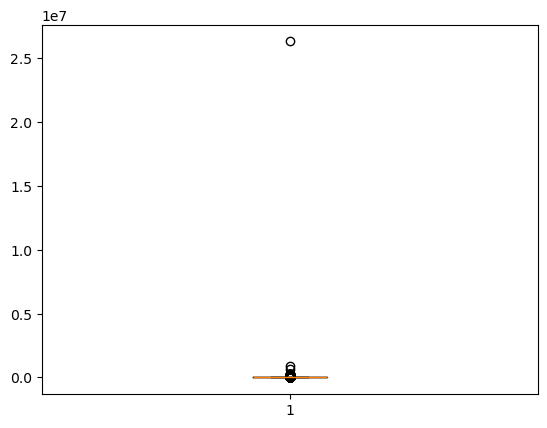

In [479]:
plt.boxplot(df["Price"])
plt.show()

In [480]:
numeric_cols = [col for col in df.columns if df[col].dtypes == 'int32' or df[col].dtypes == 'int64']
categorical_cols = [col for col in df.columns if df[col].dtypes == "category" or df[col].dtypes == "O"]

In [481]:
outliers_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")

Column: ID, Outliers: 2460
Column: Price, Outliers: 1055
Column: Levy, Outliers: 160
Column: Prod. year, Outliers: 962
Column: Mileage, Outliers: 635
Column: Cylinders, Outliers: 4765
Column: Doors, Outliers: 892
Column: Airbags, Outliers: 0


In [482]:
for col in ["Price","Levy"]:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [483]:
df.shape

(17708, 19)

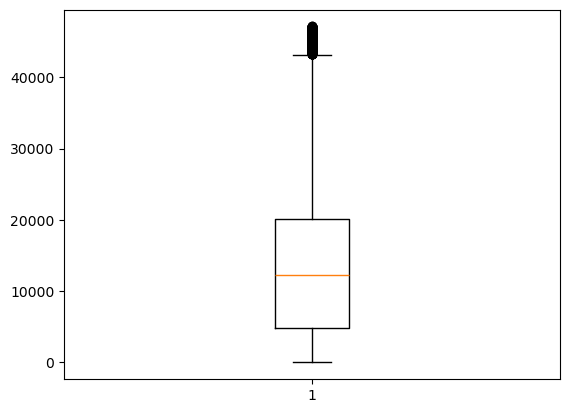

In [484]:
plt.boxplot(df["Price"])
plt.show()

In [485]:
df.to_csv("Data/car_prices_cleaned.csv", index=False)

----

**Encoding Data:**

In [486]:
df_encoded = df.copy()
df_encoded.drop("ID", axis=1, inplace=True)

In [487]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded["Wheel"] = le.fit_transform(df_encoded["Wheel"])

In [488]:
# one hot encoding to columns ["Gear box type","Drive wheels","Fuel type","Color","Category"]
df_encoded = pd.get_dummies(df_encoded, columns=["Gear box type","Drive wheels","Fuel type","Color","Category"], drop_first=True)

In [489]:
# Target encoding to column ["Manufacturer","Model"]
from category_encoders import TargetEncoder

mean_target = df_encoded.groupby("Manufacturer")["Price"].mean()
df_encoded["Manufacturer_target"] = df_encoded["Manufacturer"].map(mean_target)
df_encoded.drop("Manufacturer", axis=1, inplace=True)

y = df_encoded["Price"]
X = df_encoded.drop(columns=["Price"])
encoder = TargetEncoder(cols=["Model"], smoothing=10)
X_model_enc = encoder.fit_transform(X, y)
df_encoded = pd.concat([X_model_enc, y], axis=1)

In [490]:
df_encoded.head()

,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Wheel,Airbags,...,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Manufacturer_target,Price
0,1399,7109.893637,2010,True,3.5,186005,6,4,0,12,...,False,True,False,False,False,False,False,False,12667.128947,13328
1,1018,10796.543031,2011,False,3.0,192000,6,4,0,8,...,False,True,False,False,False,False,False,False,13745.235236,16621
2,0,10800.315909,2006,False,1.3,200000,4,4,1,2,...,True,False,False,False,False,False,False,False,11076.445067,8467
3,862,8172.567881,2011,True,2.5,168966,4,4,0,0,...,False,True,False,False,False,False,False,False,12232.050682,3607
4,446,10800.315909,2014,True,1.3,91901,4,4,0,4,...,True,False,False,False,False,False,False,False,11076.445067,11726


In [491]:
df_encoded.to_csv("Data/car_prices_encoded.csv", index=False)

---

**Scaling Data:**

In [492]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_encoded.copy()
scaler = StandardScaler()
df_scaled[["Levy","Model","Prod. year","Engine volume","Mileage","Cylinders","Doors","Airbags","Manufacturer_target"]] = scaler.fit_transform(df_scaled[["Levy","Model","Prod. year","Engine volume","Mileage","Cylinders","Doors","Airbags","Manufacturer_target"]])

df_scaled.head()

,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Wheel,Airbags,...,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Manufacturer_target,Price
0,1.624841,-1.250001,-0.120551,True,1.547641,-0.029136,1.318457,0.185415,0,1.258093,...,False,True,False,False,False,False,False,False,-0.350607,13328
1,0.851295,-0.593441,0.057565,False,0.925617,-0.029017,1.318457,0.185415,0,0.331027,...,False,True,False,False,False,False,False,False,-0.083938,16621
2,-1.215554,-0.592769,-0.833013,False,-1.189265,-0.028859,-0.464932,0.185415,1,-1.059571,...,True,False,False,False,False,False,False,False,-0.744061,8467
3,0.534568,-1.060748,0.057565,True,0.303593,-0.029474,-0.464932,0.185415,0,-1.523103,...,False,True,False,False,False,False,False,False,-0.458223,3607
4,-0.310039,-0.592769,0.591911,True,-1.189265,-0.031002,-0.464932,0.185415,0,-0.596038,...,True,False,False,False,False,False,False,False,-0.744061,11726


In [493]:
df_scaled.to_csv("Data/car_prices_scaled.csv", index=False)

-----

**EDA:**

In [494]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,has_Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6,Automatic,4x4,4,Left,Silver,12,False
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6,Tiptronic,4x4,4,Left,Black,8,False
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4,Variator,Front,4,Right,Black,2,False
3,45769185,3607,862,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4,Automatic,4x4,4,Left,White,0,False
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4,Automatic,Front,4,Left,Silver,4,False


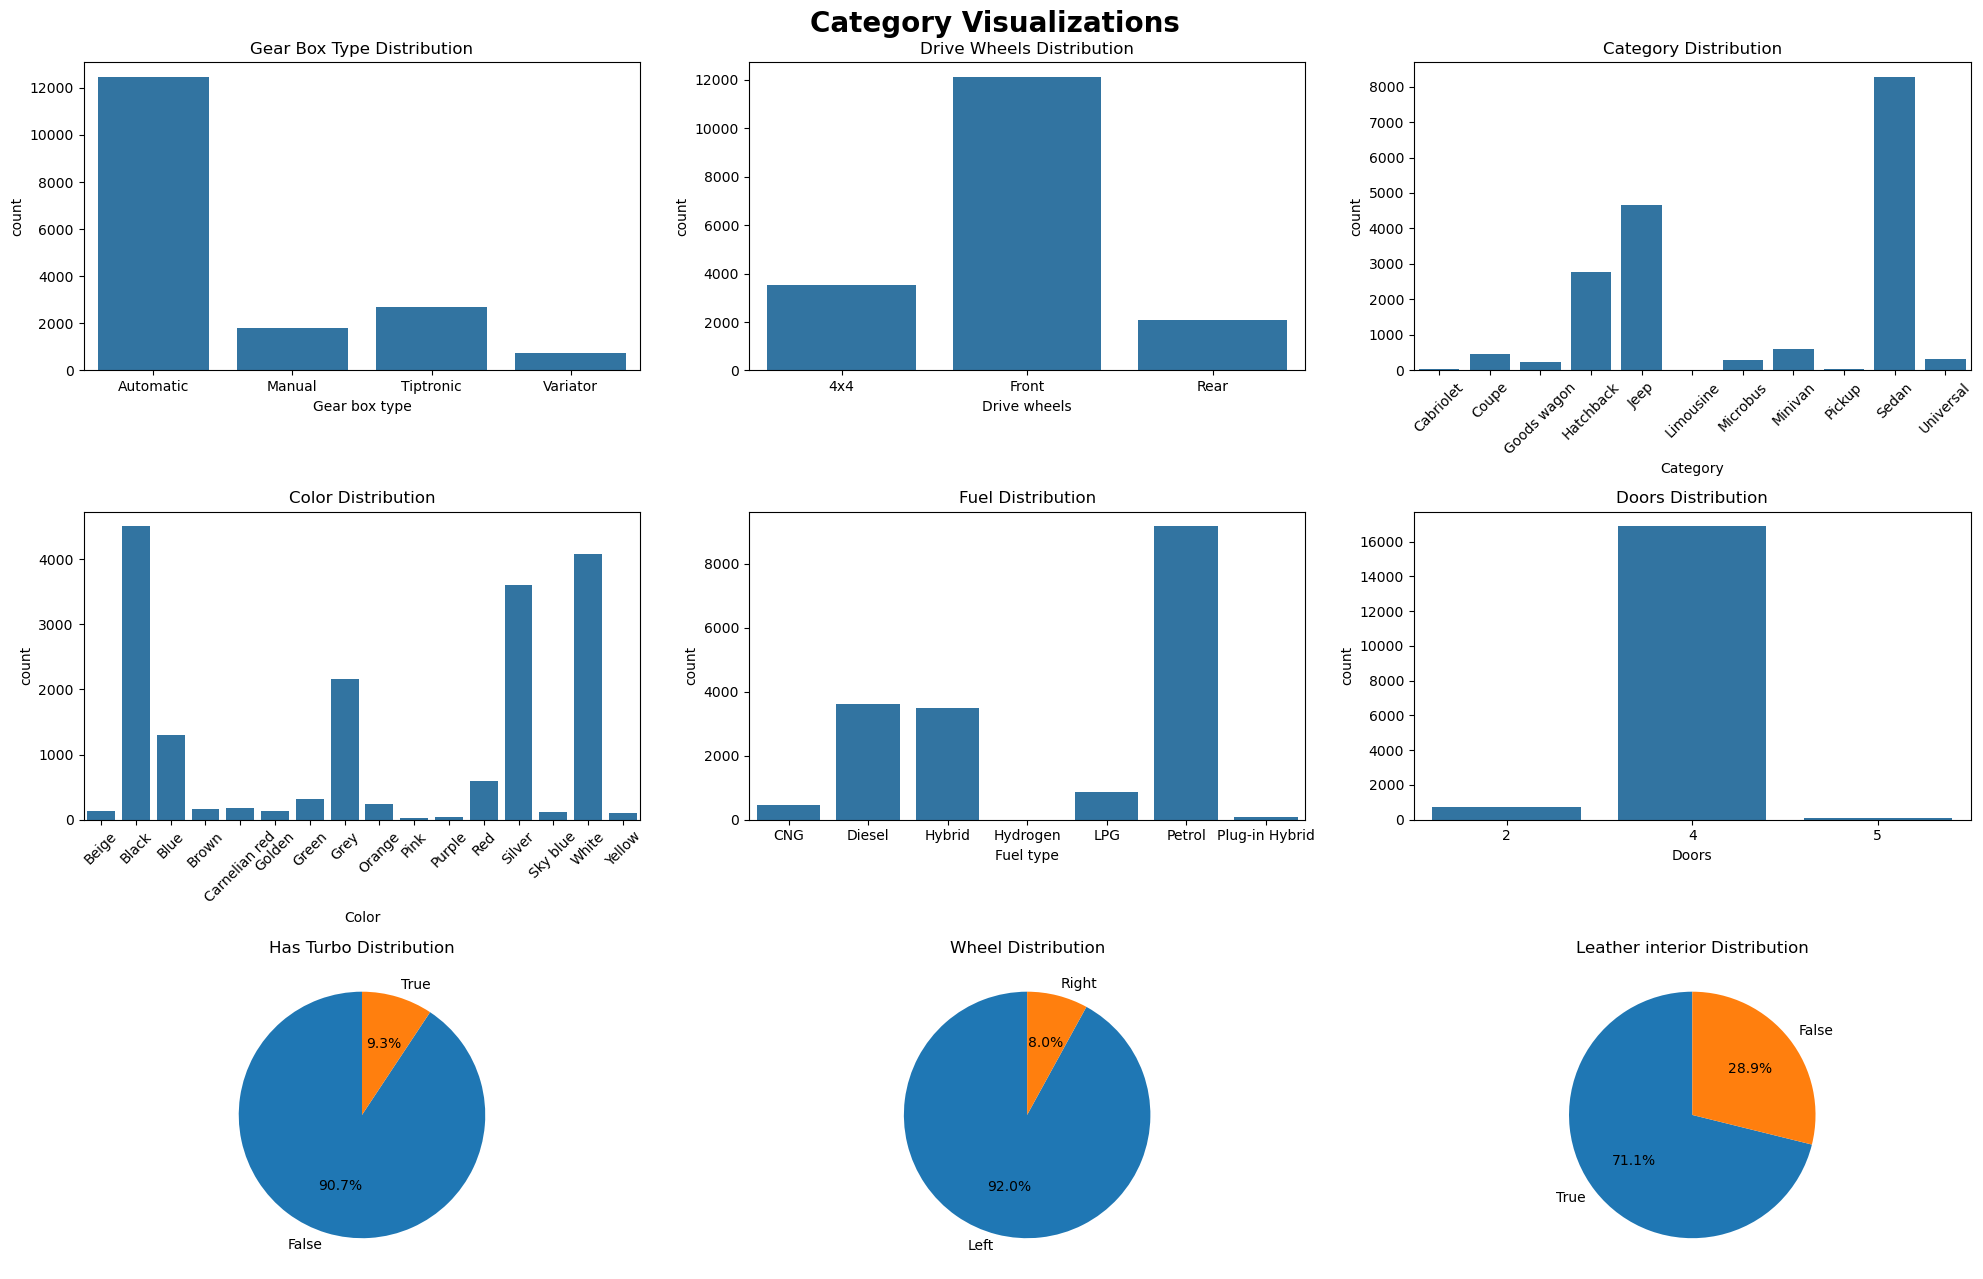

In [495]:
fig, axes = plt.subplots(3, 3, figsize=(20, 13))
plt.suptitle("Category Visualizations", fontsize=20, fontweight="bold")

axes[0,0].set_title("Gear Box Type Distribution")
sns.countplot(x="Gear box type", data=df, ax=axes[0, 0])

axes[0,1].set_title("Drive Wheels Distribution")
sns.countplot(x="Drive wheels", data=df, ax=axes[0, 1])

axes[0,2].set_title("Category Distribution")
sns.countplot(x="Category", data=df, ax=axes[0, 2])
axes[0,2].tick_params(axis="x", rotation=45)

axes[1,0].set_title("Color Distribution")
sns.countplot(x="Color", data=df, ax=axes[1, 0])
axes[1,0].tick_params(axis="x", rotation=45)

axes[1,1].set_title("Fuel Distribution")
sns.countplot(x="Fuel type", data=df, ax=axes[1, 1])

axes[1,2].set_title("Doors Distribution")
sns.countplot(x="Doors", data=df, ax=axes[1, 2])

axes[2,0].set_title("Has Turbo Distribution")
df["has_Turbo"].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[2,0], startangle=90)
axes[2,0].set_ylabel("")

axes[2,1].set_title("Wheel Distribution")
df["Wheel"].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[2,1], startangle=90)
axes[2,1].set_ylabel("")

axes[2,2].set_title("Leather interior Distribution")
df["Leather interior"].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[2,2], startangle=90)
axes[2,2].set_ylabel("")

plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.tight_layout()
plt.show()

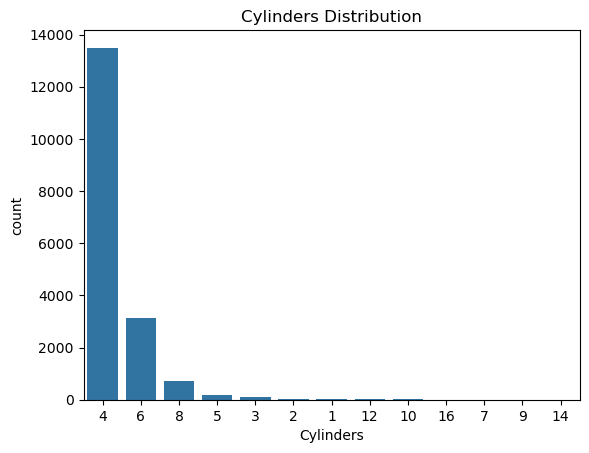

In [496]:
cylinders = df["Cylinders"].value_counts()
sns.barplot(x= cylinders.index, y= cylinders, data=pd.DataFrame(cylinders), order=cylinders.index)
plt.title("Cylinders Distribution")
plt.show()

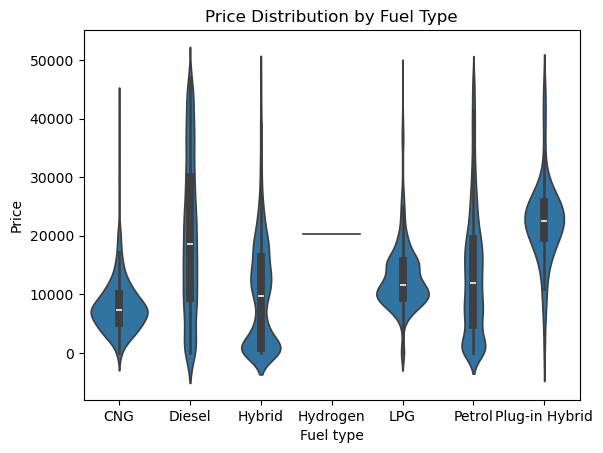

In [497]:
sns.violinplot(x="Fuel type", y="Price", data=df)
plt.title("Price Distribution by Fuel Type")
plt.show()

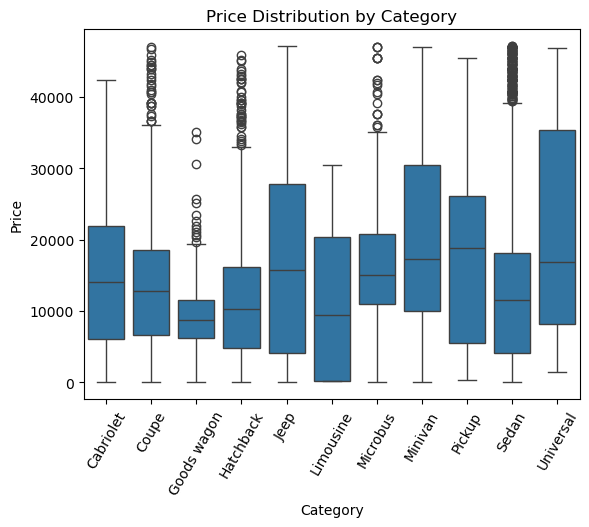

In [498]:
sns.boxplot(x="Category", y="Price", data=df)
plt.xticks(rotation=60)
plt.title("Price Distribution by Category")
plt.show()

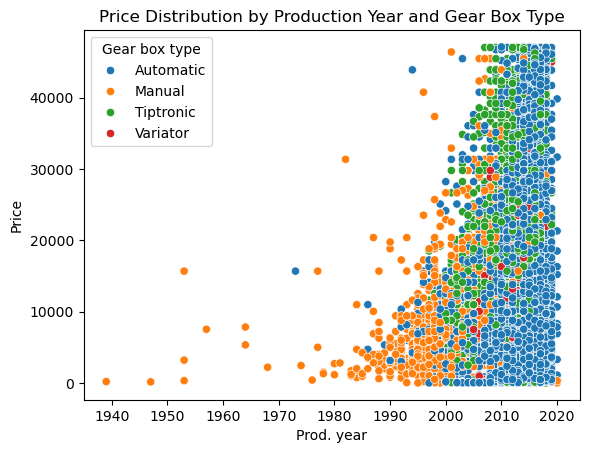

In [499]:
sns.scatterplot(x="Prod. year", y="Price", data=df, hue="Gear box type")
plt.title("Price Distribution by Production Year and Gear Box Type")
plt.show()

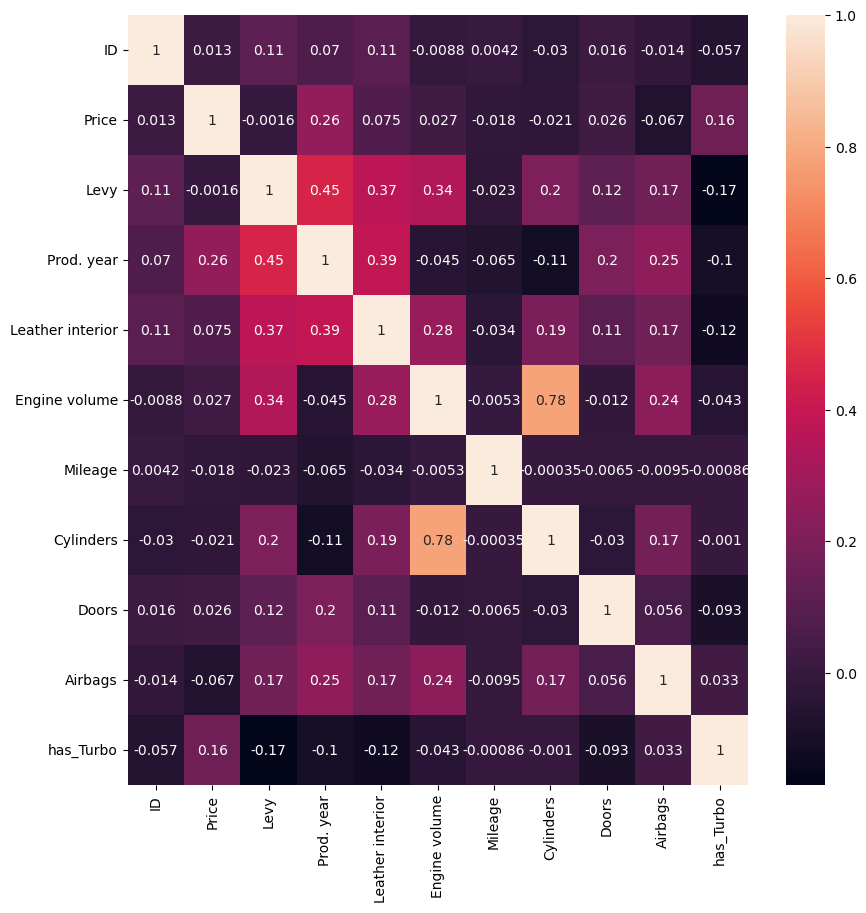

In [500]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [502]:
from scipy import stats
categorical_cols = [col for col in df.columns if df[col].dtypes == "category" or df[col].dtypes == "O"] 

for col in categorical_cols:
    print("Column:", col)
    groups = [df[df[col]==cat]["Price"] for cat in df[col].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    print("F-statistic:", f_stat, " P-value:", p_val)
    print("\n")

Column: Manufacturer
F-statistic: 43.183367998757795  P-value: 0.0


Column: Model
F-statistic: 6.2221080707258585  P-value: 0.0


Column: Category
F-statistic: 118.78865753731614  P-value: 8.857123228802323e-241


Column: Fuel type
F-statistic: 289.2507700243555  P-value: 0.0


Column: Gear box type
F-statistic: 282.3539794469299  P-value: 4.8296957666519947e-179


Column: Drive wheels
F-statistic: 22.973941012436914  P-value: 1.0850969522775447e-10


Column: Wheel
F-statistic: 359.1408475120322  P-value: 2.638782654335862e-79


Column: Color
F-statistic: 11.822502289388238  P-value: 1.1951718766441112e-29


